# Predict Customers Click on E-commerce Banner

Source    : https://www.dqlab.id/

Typed by  : Aulia Khalqillah

Objective : Does the new customers will access the banner or not?

## Import Libraries

In [220]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report

## Load Data

In [221]:
data = pd.read_csv('ecommerce_banner_promo.csv')
data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,3/27/2016 0:53,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,4/4/2016 1:39,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,3/13/2016 20:35,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,1/10/2016 2:31,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,6/3/2016 3:36,0


## Exploratory Data Analysis

In [222]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


Let's take a look. The Timestamp feature is an object data type. In this case, we want it to be date-time format. So, we have to convert it to date-time format. 

In [223]:
data['Timestamp'] = pd.to_datetime(data['Timestamp'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Daily Time Spent on Site  1000 non-null   float64       
 1   Age                       1000 non-null   int64         
 2   Area Income               1000 non-null   float64       
 3   Daily Internet Usage      1000 non-null   float64       
 4   Ad Topic Line             1000 non-null   object        
 5   City                      1000 non-null   object        
 6   Male                      1000 non-null   int64         
 7   Country                   1000 non-null   object        
 8   Timestamp                 1000 non-null   datetime64[ns]
 9   Clicked on Ad             1000 non-null   int64         
dtypes: datetime64[ns](1), float64(3), int64(3), object(3)
memory usage: 78.2+ KB


Now, we have to check, are there any empty (null) values in this dataset?

In [224]:
data.isnull().sum()

Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
City                        0
Male                        0
Country                     0
Timestamp                   0
Clicked on Ad               0
dtype: int64

As we can see, there are no empty values in this dataset. Next, we can check teh short statistic of this dataset as follows.

In [225]:
data.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


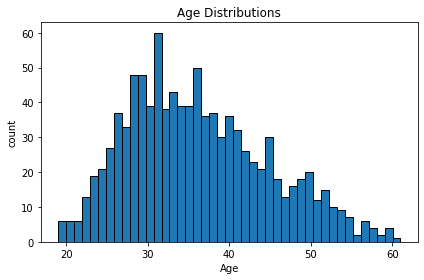

In [226]:
plt.hist(data['Age'], edgecolor='black', bins = data.Age.nunique())
plt.xlabel('Age')
plt.ylabel('count')
plt.title('Age Distributions')
plt.tight_layout()
plt.show()

There are 1000 data of customers who visit the website. There is no missing value in this data. As we can see, the average daily time spent on site is 65.00 minutes. The average of visitors age who visit the site is 36 years old (where the standard deviation is around 8.78 years old). It means, the visitor’s age range of 25 – 44 years old.

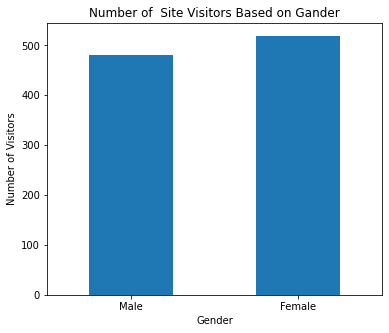

        Number_of_Visitors
Male                   481
Female                 519


In [227]:
n_male_gender = data[data['Male']==1]['Male'].count()
n_female_gender = data[data['Male']==0]['Male'].count()
n_gender = pd.DataFrame(
    [n_male_gender, n_female_gender],
    index=['Male','Female'],
    columns=['Number_of_Visitors']
)

n_gender.plot(kind='bar',legend=None,figsize=(6,5))
plt.xticks(rotation=0)
plt.xlabel('Gender')
plt.ylabel('Number of Visitors')
plt.title('Number of  Site Visitors Based on Gander')
plt.show()

print(n_gender)

**Number of Clicked on Advertisment**

In [228]:
n_click_adv = data.groupby(['Clicked on Ad','Male']).size().reset_index()
n_click_adv.columns = ['Clicked on Ad','Male','Number of Visitors']
n_click_adv

,Clicked on Ad,Male,Number of Visitors
0,0,0,250
1,0,1,250
2,1,0,269
3,1,1,231


Of 1000 visitors, there were 500 visitors who clicked the advertisement and 500 others who didn’t. Specifically, there are 269 female visitors and 231 male visitors who clicked the advertisement. Female visitors are more like clicked on advertisements than male visitors.

**Calculate the correlation**

In [229]:
correlation = data.corr()
df_corr = correlation['Clicked on Ad'].drop('Clicked on Ad', axis=0).reset_index().rename(columns={'index':'Feature'}).sort_values('Clicked on Ad', ascending=False)
df_corr

,Feature,Clicked on Ad
1,Age,0.492531
4,Male,-0.038027
2,Area Income,-0.476255
0,Daily Time Spent on Site,-0.748117
3,Daily Internet Usage,-0.786539


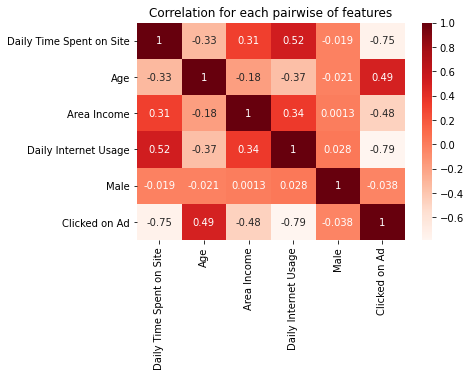

In [230]:
ax1 = sns.heatmap(correlation, annot=True, annot_kws={'size': 10}, cmap='Reds')
ax1.set_title('Correlation for each pairwise of features')
plt.show()

The “Clicked on Ad” feature has a positive correlation to the Age feature around 49% of confidence. Although this confidence level is still below 50%, this still can be considered a factor to affect the “Clicked on Ad” feature. Furthermore, the “Clicked on Ad” feature has an inverse correlation to the “Daily Internet Usage” and “Daily Time Spent on Site” features. It means, that during the short period of daily internet usage, the advertisement has a chance of around 78% clicked and if the visitors less spent time on the site, the advertisement has a chance of around 75% clicked. So, the “Daily Time Spent on Site”, “Daily Internet Usage” and “Age” features are considered as input parameters for our further model.

From 1000 site visitors, there 500 visitors who clicked the advertisment and 500 others didn't. Specifically, there are 269 female visitors and 231 male visitors clicked the advertisment.

The age of site visitors has range from 20 to 60. The age of site visitors are diminated in range 27 to 45 years old.

## Generate Model

In this case, we use two models of prediction, there are Logistic Regression and Decision Tree. We will evaluate which model gives the fit result for this case. Before we apply the model of prediction, we split the data into the main dataset and the target dataset. The main dataset is consist of “Daily Time Spent on Site”, “Daily Internet Usage” and “Age” features. Then, the target dataset is the “Clicked on Ad” feature. This can be done by using the following code

In [231]:
X = data.drop(['Ad Topic Line','City','Country','Timestamp','Clicked on Ad','Male','Area Income'], axis = 1)
y = data['Clicked on Ad']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)
X.columns.tolist()

['Daily Time Spent on Site', 'Age', 'Daily Internet Usage']

### Logistic Regressor

In [232]:
logreg = LogisticRegression()
logreg = logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_test)

**Confusion Matrix**

The confusion matrix is used to check the model performence in logistic prediction. Let's check the perfomence between the prediction and test data as the following command

In [233]:
tn_lr, fp_lr, fn_lr, tp_lr = confusion_matrix(y_test,y_pred).ravel()
print('Total Test Number:', len(y_test))
print('True Negative:', tn_lr)
print('False Positive:', fp_lr)
print('False Negative:', fn_lr)
print('True Positive:', tp_lr)

Total Test Number: 200
True Negative: 83
False Positive: 6
False Negative: 8
True Positive: 103


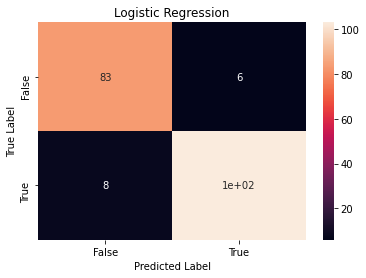

In [234]:
ax2 = sns.heatmap(np.asarray([[tn_lr, fp_lr], [fn_lr, tp_lr]]), annot=True, xticklabels=['False','True'], yticklabels=['False','True'])
ax2.set_title('Logistic Regression')
ax2.set(ylabel='True Label', xlabel='Predicted Label');

In [235]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.93      0.92        89
           1       0.94      0.93      0.94       111

    accuracy                           0.93       200
   macro avg       0.93      0.93      0.93       200
weighted avg       0.93      0.93      0.93       200



### Decision Tree

In [236]:
dtree = DecisionTreeClassifier()
dtree = dtree.fit(X_train,y_train)
y_pred_dtree = dtree.predict(X_test)

**Confusion Matrix**

In [237]:
tn_dtree, fp_dtree, fn_dtree, tp_dtree = confusion_matrix(y_test,y_pred_dtree).ravel()
print('Total Test Number:', len(y_test))
print('True Negative:', tn_dtree)
print('False Positive:', fp_dtree)
print('False Negative:', fn_dtree)
print('True Positive:', tp_dtree)

Total Test Number: 200
True Negative: 81
False Positive: 8
False Negative: 9
True Positive: 102


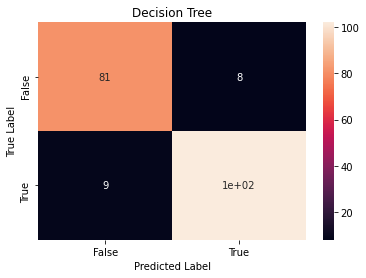

In [238]:
ax3 = sns.heatmap(np.asarray([[tn_dtree, fp_dtree], [fn_dtree, tp_dtree]]), annot=True, xticklabels=['False','True'], yticklabels=['False','True'])
ax3.set_title('Decision Tree')
ax3.set(ylabel='True Label', xlabel='Predicted Label');

In [239]:
print(classification_report(y_test,y_pred_dtree))

              precision    recall  f1-score   support

           0       0.90      0.91      0.91        89
           1       0.93      0.92      0.92       111

    accuracy                           0.92       200
   macro avg       0.91      0.91      0.91       200
weighted avg       0.92      0.92      0.92       200



## Model Explanation Results

We have just applied two prediction algorithms to predict whether the customers would click on an advertisement or not. The models are Logistic Regression and Decision Tree. Each algorithm has a result performance through the confusion matrix. For this purpose, we see the sensitivity (recall) from the classification report. The Logistic Regression has 93% of sensitivity (recall) for the customers who would click on the advertisement and the Decision Tree has 92% of sensitivity (recall) for the customers who would click on the advertisement. This means the Logistic Regression is more fit to predict this case than the Decision Tree. For the information, the sensitivity is used to calculate the percentage of the data that are correctly predicted from the total data that is actually correct.

## Conclusions

<!-- wp:paragraph -->
<p>1. The customer's ages that often visit the site are in the range of 27-45 years old.</p>
<!-- /wp:paragraph -->

<!-- wp:paragraph -->
<p>2. From 1000 site visitors, there were 500 visitors who clicked the advertisement and 500 others who didn't. Specifically, there are 269 female visitors and 231 male visitors who clicked the advertisement. Female visitors are more like click on the advertisement than the male.</p>
<!-- /wp:paragraph -->

<!-- wp:paragraph -->
<p>3. The features of Daily Time Spent on Site, Age, and Male have a high correlation to the Click on Ad. So, these features are considered as our input parameter and the Click on Ad as our target label.</p>
<!-- /wp:paragraph -->

<!-- wp:paragraph -->
<p>4. The Logistic Regression is more fit than the Decision Tree for predicting the new customer who clicks on the advertisement according to sensitivity.</p>
<!-- /wp:paragraph -->

## Test A Model

**Case 1:**

- Daily Time Spent on Site = 60
- Age = 26
- Daily Internet Usage = 100

In [240]:
dtss,age,internet_usage = [60,26,100]
test = pd.DataFrame([dtss,age,internet_usage],index=['Daily Time Spent on Site', 'Age', 'Daily Internet Usage']).T
predict = logreg.predict(test)
predict.tolist()

[1]

The new visitor is predicted would click on the advertisement.

**Case 2:**

- Daily Time Spent on Site = 60
- Age = 26
- Daily Internet Usage = 250

In [241]:
dtss,age,internet_usage = [60,26,250]
test = pd.DataFrame([dtss,age,internet_usage],index=['Daily Time Spent on Site', 'Age', 'Daily Internet Usage']).T
predict = logreg.predict(test)
predict.tolist()

[0]

The new visitor is predicted would not click on the advertisement.

**Case 3:**

- Daily Time Spent on Site = 120
- Age = 26
- Daily Internet Usage = 100

In [242]:
dtss,age,internet_usage = [120,26,100]
test = pd.DataFrame([dtss,age,internet_usage],index=['Daily Time Spent on Site', 'Age', 'Daily Internet Usage']).T
predict = logreg.predict(test)
predict.tolist()

[0]

If the new visitor spent more time on the site (120), this visitor is predicted would not click on the advertisement.